In [1]:
%%markdown
# Data Modelling

# Data Modelling


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os 
import seaborn as sns 
import sklearn as skl
from imblearn.over_sampling import SMOTE
from scipy.stats import norm 
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

import warnings  
warnings.filterwarnings('ignore') 
%matplotlib inline 

In [3]:
data = pd.read_csv('created_data/feature_engineered_data.csv')
X = data.drop(['Response'],axis= 1)
y = data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (11006, 35)
After OverSampling, the shape of train_y: (11006,) 

After OverSampling, counts of label '1': 5503
After OverSampling, counts of label '0': 5503


In [4]:
%%markdown
## Building Logisting Regression Model 

## Building Logisting Regression Model 


In [5]:
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions))

cross_val_score_svc = cross_validate(lr1, X_train_res, y_train_res,cv = 5)
print('Cross validation test_score',cross_val_score_svc['test_score'].mean())

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      2323
           1       0.35      0.46      0.40       418

    accuracy                           0.79      2741
   macro avg       0.62      0.65      0.64      2741
weighted avg       0.81      0.79      0.80      2741

Cross validation test_score 0.7831287982797018


In [6]:
%%markdown
## Building Support Vector Classification Model 

## Building Support Vector Classification Model 


In [7]:
svc = SVC()
svc.fit(X_train_res, y_train_res)
svc_pred = svc.predict(X_test)

print(confusion_matrix(svc_pred,y_test))
print('accuracy_score:',accuracy_score(svc_pred, y_test))
print(classification_report(svc_pred, y_test))

cross_val_score_svc = cross_validate(svc, X_train_res, y_train_res,cv = 5)
print('Cross validation test_score',cross_val_score_svc['test_score'].mean())

[[2015  155]
 [ 308  263]]
accuracy_score: 0.8310835461510397
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2170
           1       0.63      0.46      0.53       571

    accuracy                           0.83      2741
   macro avg       0.75      0.69      0.71      2741
weighted avg       0.82      0.83      0.82      2741

Cross validation test_score 0.8800739157042397


In [8]:
%%markdown
## Building Random Forest Classifier Model 

## Building Random Forest Classifier Model 


In [9]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_res, y_train_res)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(rfc_pred,y_test))
print('Accuracy score:',accuracy_score(rfc_pred, y_test))
print(classification_report(rfc_pred, y_test))

cross_val_score_rfc = cross_validate(rfc, X_train_res, y_train_res,cv = 5)

print('Cross validation test_score',cross_val_score_rfc['test_score'].mean())

[[2245   82]
 [  78  336]]
Accuracy score: 0.9416271433783291
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2327
           1       0.80      0.81      0.81       414

    accuracy                           0.94      2741
   macro avg       0.89      0.89      0.89      2741
weighted avg       0.94      0.94      0.94      2741

Cross validation test_score 0.9573909720666149


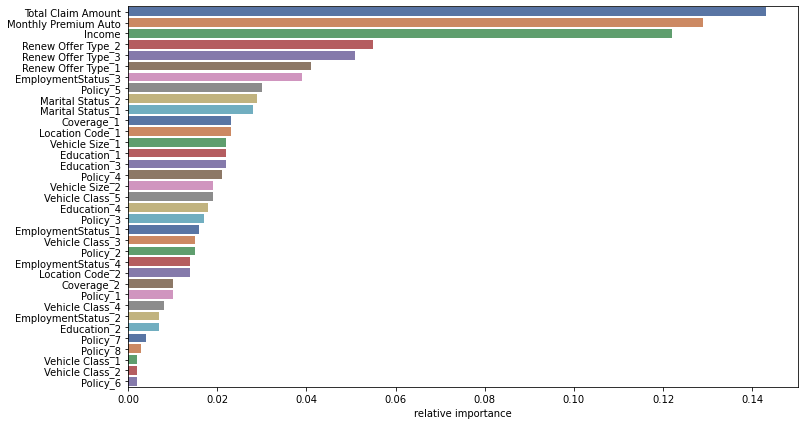

In [10]:
feature_imp = rfc.feature_importances_.round(3)
ser_rank = pd.Series(feature_imp, index=X.columns).sort_values(ascending = False)

plt.figure(figsize=(12,7))
sns.barplot(x= ser_rank.values, y = ser_rank.index, palette='deep')
plt.xlabel('relative importance')
plt.show()

In [11]:
%%markdown
## Building XGBoost Classifier Model 

## Building XGBoost Classifier Model 


In [12]:
xgbc = XGBClassifier()
xgbc.fit(X_train_res, y_train_res)
xgbc_pred = xgbc.predict(X_test)

print(confusion_matrix(xgbc_pred,y_test))
print('Accuracy score:',accuracy_score(xgbc_pred, y_test))
print(classification_report(xgbc_pred, y_test))

cross_val_score_rfc = cross_validate(xgbc, X_train_res, y_train_res,cv = 5)

print('Cross validation test_score',cross_val_score_rfc['test_score'].mean())

[[2216   36]
 [ 107  382]]
Accuracy score: 0.9478292593943816
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2252
           1       0.91      0.78      0.84       489

    accuracy                           0.95      2741
   macro avg       0.93      0.88      0.91      2741
weighted avg       0.95      0.95      0.95      2741

Cross validation test_score 0.9556625858694401


In [32]:
for i in xgbc.predict_proba(X_test):
    print(i[1])

0.0037373174
0.0047688587
0.07626563
0.002407774
0.00037265953
0.048129812
0.0008693985
0.004054049
0.008236791
0.0001401292
0.011267487
0.050670754
0.04383869
0.5955048
0.010332467
0.0014382647
0.8940042
0.0017820785
0.20350781
0.09565592
0.006654678
0.8288491
0.00102801
0.12665929
0.009676205
2.508233e-05
0.00053890917
0.7179884
0.41449878
0.012347702
0.19871949
0.003236085
8.329142e-05
0.0010413264
0.059705008
0.47790825
0.60127896
0.067829005
8.6491396e-05
0.06701649
0.020608075
0.0028009135
0.6179777
0.5487881
0.012476481
0.0047098584
0.46706507
0.0074439356
0.013816646
0.18950269
0.03121401
0.00025829658
0.01409901
0.0006853372
0.10677356
0.0124883475
0.44225082
0.010054186
0.011927912
2.5680287e-05
0.76406515
0.2523341
0.13284461
0.046188623
0.0033342137
0.0057080477
0.0068974
0.73340684
0.041845392
0.07507966
0.8819371
0.06431945
0.057225466
0.00059496035
0.086481415
0.17496262
0.8074948
0.067994244
0.07826146
0.027300837
0.36591437
0.1621694
0.015349557
0.03155137
3.9874903e-0

0.11114265
4.5187735e-05
0.0041714627
0.007998434
0.09593997
0.00020754957
0.5953083
0.048341233
0.9438302
0.00032277944
0.022340735
0.0007006313
0.00013412285
0.098855086
0.9739699
0.18317747
0.0021084223
9.2654e-05
0.05626188
0.001999689
0.5711718
0.0010783811
0.9833418
0.8686972
0.8705464
0.0015071738
0.75668633
0.17241594
0.31678203
0.013408566
0.0003988274
0.09398098
0.013661532
0.03589405
0.023875479
0.38841975
0.31765231
0.7494888
0.00081840646
0.00017544503
0.4251254
0.06798564
0.0007025509
0.0021877487
0.41304907
0.0034816402
0.0011151397
0.8694356
0.024941234
0.061018348
0.93052113
0.005812947
0.079439804
0.49802318
0.15322822
0.73183334
0.00016666183
0.00048605684
0.09143525
0.0008658189
6.1653404e-06
0.009059964
0.056590505
0.33980525
0.93903875
0.10020917
0.0012653435
0.2393135
0.00033730007
0.44165194
0.8594845
0.0095786555
0.0007030512
0.032856483
0.01571639
0.03725118
0.5385487
0.00093676517
0.010108826
0.0002059373
0.74081224
0.39444447
0.25533035
0.8462318
0.004558664

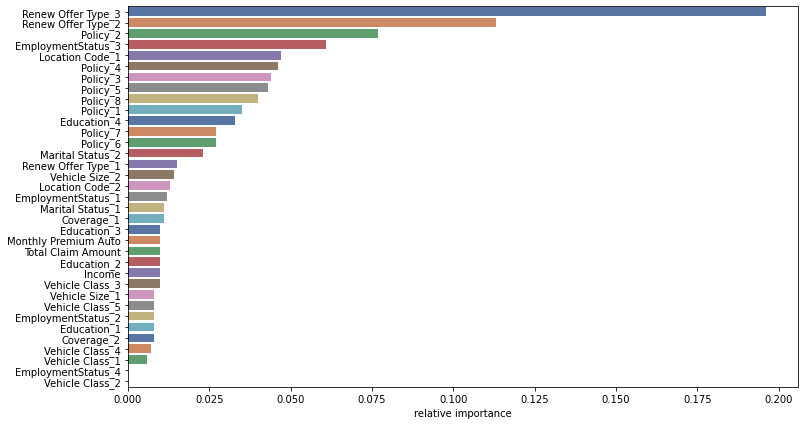

In [13]:
feature_imp = xgbc.feature_importances_.round(3)
ser_rank = pd.Series(feature_imp, index=X.columns).sort_values(ascending = False)

plt.figure(figsize=(12,7))
sns.barplot(x= ser_rank.values, y = ser_rank.index, palette='deep')
plt.xlabel('relative importance')
plt.show()

In [14]:
%%markdown 
## Building a Neural Network Model 

## Building a Neural Network Model 


In [15]:
x_check = X_train_res.values
y_check = y_train_res
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=35, activation='relu'))
    model.add(Dense(35,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_model, epochs=10, batch_size=5, verbose=1)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, x_check, y_check, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/10
1761/1761 [==============================] - 3s 2ms/step - loss: 0.5009 - accuracy: 0.7419
Epoch 2/10
1761/1761 [==============================] - 3s 2ms/step - loss: 0.3841 - accuracy: 0.8120
Epoch 3/10
1761/1761 [==============================] - 3s 2ms/step - loss: 0.3601 - accuracy: 0.8226
Epoch 4/10
1761/1761 [==============================] - 4s 2ms/step - loss: 0.3442 - accuracy: 0.8381
Epoch 5/10
1761/1761 [==============================] - 4s 2ms/step - loss: 0.3317 - accuracy: 0.8443
Epoch 6/10
1761/1761 [==============================] - 4s 2ms/step - loss: 0.3198 - accuracy: 0.8501
Epoch 7/10
1761/1761 [==============================] - 4s 2ms/step - loss: 0.3104 - accuracy: 0.8595
Epoch 8/10
1761/1761 [==============================] - 4s 2ms/step - loss: 0.3040 - accuracy: 0.8609
Epoch 9/10
1761/1761 [==============================] - 3s 2ms/step - loss: 0.2969 - accuracy: 0.8620
Epoch 10/10
441/441 [==============================] - 1s 1ms/step - loss: 0.2947 

In [25]:
estimator.fit(X_train_res,y_train_res)

Epoch 1/10
2202/2202 [==============================] - 5s 2ms/step - loss: 0.4764 - accuracy: 0.7560
Epoch 2/10
2202/2202 [==============================] - 5s 2ms/step - loss: 0.3848 - accuracy: 0.8046
Epoch 3/10
2202/2202 [==============================] - 5s 2ms/step - loss: 0.3559 - accuracy: 0.8246
Epoch 4/10
2202/2202 [==============================] - 5s 2ms/step - loss: 0.3365 - accuracy: 0.8345
Epoch 5/10
2202/2202 [==============================] - 5s 2ms/step - loss: 0.3211 - accuracy: 0.8500
Epoch 6/10
2202/2202 [==============================] - 5s 2ms/step - loss: 0.3088 - accuracy: 0.8568
Epoch 7/10
2202/2202 [==============================] - 5s 2ms/step - loss: 0.2973 - accuracy: 0.8625
Epoch 8/10
2202/2202 [==============================] - 5s 2ms/step - loss: 0.2858 - accuracy: 0.8708
Epoch 9/10
2202/2202 [==============================] - 6s 3ms/step - loss: 0.2768 - accuracy: 0.8787
Epoch 10/10
2202/2202 [==============================] - 6s 3ms/step - loss: 0.268

In [26]:
y_nn_pred = estimator.predict(X_test)
print(classification_report(y_nn_pred, y_test))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
549/549 [==============================] - 0s 822us/step
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2148
           1       0.63      0.44      0.52       593

    accuracy                           0.82      2741
   macro avg       0.74      0.69      0.71      2741
weighted avg       0.81      0.82      0.81      2741



In [28]:
%%markdown

## Conclusions

### The XGBoost Classifier performs the best among all the models with the highest F1 score of 0.95. 

For measuring the accuracy of a classification model it is important to check for the precision and recall of all the classes being classified. In our case, since we initially had an undersampled class, it is especially importantant to look for wrong predictions of the undersampled class. 
We see issues with incorrect and not so great precdictions with the Logistic Regression and the Support Vector Classifier. 
The Neural Network also does not do great with the initial tuning. The Neural Network also takes much more time than the XGBoost and so it does not seem to be a feasible option. 

I therefore decide to move ahead with the XGBoost Classifier as my final model. 



## Conclusions

### The XGBoost Classifier performs the best among all the models with the highest F1 score of 0.95. 

For measuring the accuracy of a classification model it is important to check for the precision and recall of all the classes being classified. In our case, since we initially had an undersampled class, it is especially importantant to look for wrong predictions of the undersampled class. 
We see issues with incorrect and not so great precdictions with the Logistic Regression and the Support Vector Classifier. 
The Neural Network also does not do great with the initial tuning. The Neural Network also takes much more time than the XGBoost and so it does not seem to be a feasible option. 

I therefore decide to move ahead with the XGBoost Classifier as my final model. 
